In [2]:
import numpy as np
import pandas as pd
import scipy.stats

In [11]:
path = "salary_data.csv"
criteria = "ID"
source_df = pd.read_csv(path, engine="python", delimiter=";")

source_df.head(len(source_df))

,ID,income,age,gender,education_level
0,12182,86519.608537,45,M,2.0
1,81213,83085.864980,30,M,2.0
2,1996,82606.214973,22,M,2.0
3,9366,81551.229988,36,M,2.0
4,9733,79593.253224,51,M,1.0
...,...,...,...,...,...
99995,35271,15000.000000,38,M,1.0
99996,50709,15000.000000,20,M,0.0
99997,98689,15000.000000,32,F,0.0
99998,92169,15000.000000,21,M,2.0


Columns:
1. ID - Identifier of the candidate
2. incomde - The annual income declared by the person
3. age - Age of the person at the moment of the test
4. gender - Gender declared by the person
5. education_level - Education level declared by the user (0: primary complete, 1: secondary complete, 2: tertiary complete, 3: post


In [4]:
# стоит ли группировать по возрасту?
def mean_amount_by_empl(df):
    df_empl = df.groupby(criteria, as_index=False).agg({"income": "mean"})
    df_empl = df_empl.sort_values("income", ascending=False)

    return df_empl

df_empl = mean_amount_by_empl(source_df)
df_empl.head()

,ID,income
45694,45694,285342.491970
13330,13330,195398.472324
59148,59148,187006.102853
46089,46089,182555.897397
75961,75961,181406.635439


In [5]:
count_empl = len(df_empl)
income_total = df_empl["income"].sum()

print("number of employees: {}".format(count_empl))
print("total income: {}".format(int(income_total)))

number of employees: 100000
total income: 4041251647


Text(0, 0.5, 'Income')

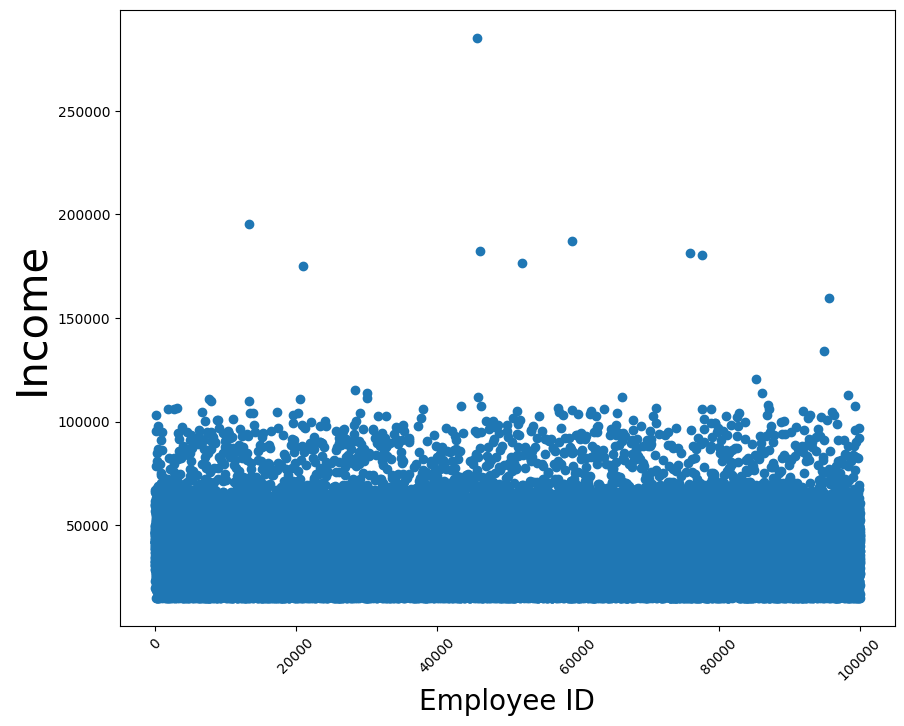

In [6]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(df_empl[criteria], df_empl["income"])
plt.xticks(rotation=45)

plt.xlabel(f"Employee {criteria}", fontsize=20)
plt.ylabel("Income", fontsize=30)

C:\Users\apershinov\AppData\Local\Temp\ipykernel_22460\3315439741.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_empl["income"], kde=False)


<AxesSubplot: xlabel='income'>

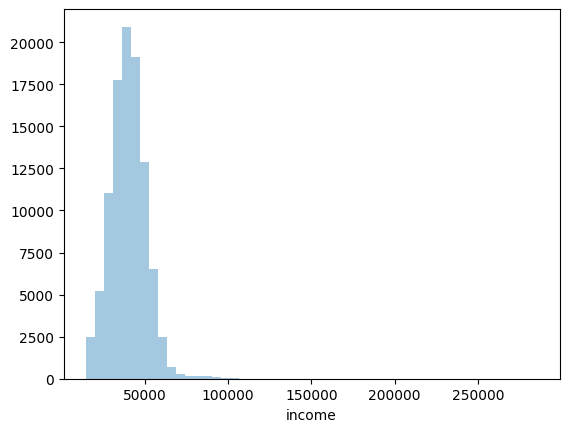

In [7]:
import seaborn as sns

sns.distplot(df_empl["income"], kde=False)

In [8]:

mean = df_empl["income"].mean()
var = df_empl["income"].var()
std = df_empl["income"].std()
median = df_empl["income"].median()

trunk_mean = scipy.stats.trim_mean(df_empl["income"], proportiontocut=0.1)

def mad(df):
    sigma = 1.2
    k = scipy.stats.lognorm.ppf(3/4., s=sigma)
    median = df.median()

    return k * np.median(np.fabs(df - median))

mad_value = mad(df_empl["income"])
print(f'Average Income Size: Average = {int(mean)}, variance = {int(var)}, standard deviation = {int(std)},\n'
      f'median = {int(median)}, truncated mean {int(trunk_mean)}, MAD = {int(mad_value)}')

Average Income Size: Average = 40412, variance = 117306078, standard deviation = 10830,
median = 40097, truncated mean 40149, MAD = 15261


In [9]:
norm_q95 = scipy.stats.norm.ppf(0.95)
mean_conf = norm_q95 * std / np.sqrt(len(df_empl))

chi2_q95_left = scipy.stats.chi2.ppf((1 - 0.05 / 2.0), df=len(df_empl) - 1)
chi2_q95_right = scipy.stats.chi2.ppf(0.05 / 2.0, df=len(df_empl) - 1)

var_conf_left = var * (len(df_empl) - 1) / chi2_q95_left
var_conf_right = var * (len(df_empl) - 1) / chi2_q95_right

std_conf_left = np.sqrt(var_conf_left)
std_conf_right = np.sqrt(var_conf_right)

print("Sample mean: %0.3f +/- %0.3f" % (mean, mean_conf))
print("95%% Confidence interval of sample variance : (%0.3f; %0.3f)"
      % (var_conf_left, var_conf_right))
print("95%% Confidence interval of sample standard deviation: (%0.3f; %0.3f)"
      % (std_conf_left, std_conf_right))

Sample mean: 40412.516 +/- 56.336
95% Confidence interval of sample variance : (116284611.313; 118341126.508)
95% Confidence interval of sample standard deviation: (10783.534; 10878.471)


C:\Users\apershinov\AppData\Local\Temp\ipykernel_22460\3642058938.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_empl["income"], kde=False, norm_hist=True, label="Average income size in roubles")


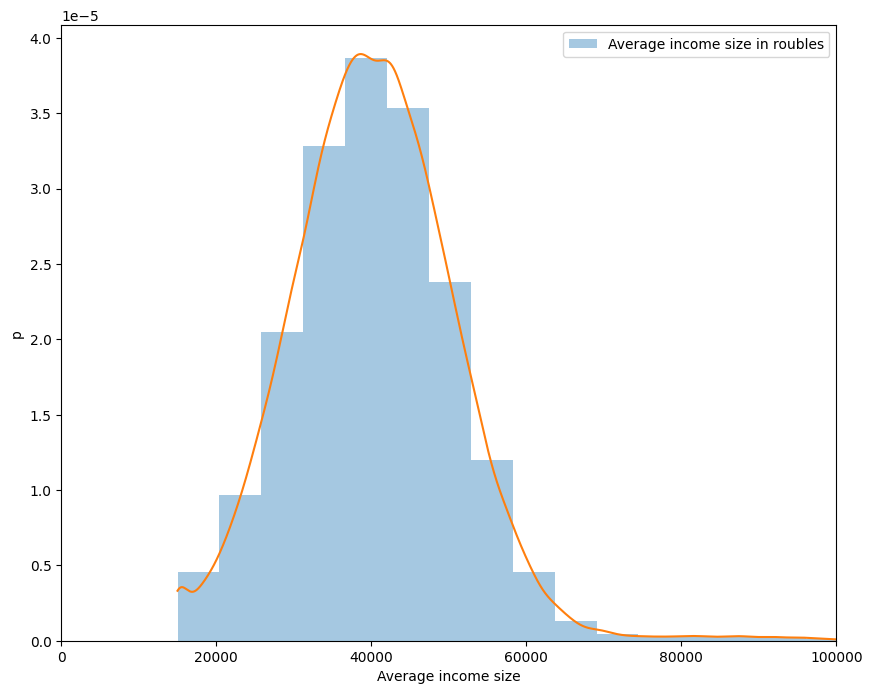

In [10]:
plt.figure(figsize=(10, 8))

kernel = scipy.stats.gaussian_kde(df_empl["income"])

min_price, max_price = df_empl["income"].min(), df_empl["income"].max()
x = np.linspace(min_price, max_price, len(df_empl))
kde_values = kernel.evaluate(x)

sns.distplot(df_empl["income"], kde=False, norm_hist=True, label="Average income size in roubles")
plt.plot(x, kde_values)

plt.ylabel("p")
plt.xlabel("Average income size")
plt.xlim(0, 10e4)
plt.legend()
plt.show()
